In [2]:
import numpy as np
import pandas as pd
import os
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import wilcoxon
from plotnine import *

datasets_dir = "../../data"

In [ ]:
split="secondary"

In [ ]:
results_test = pd.read_csv('../../results/Results_test.csv')

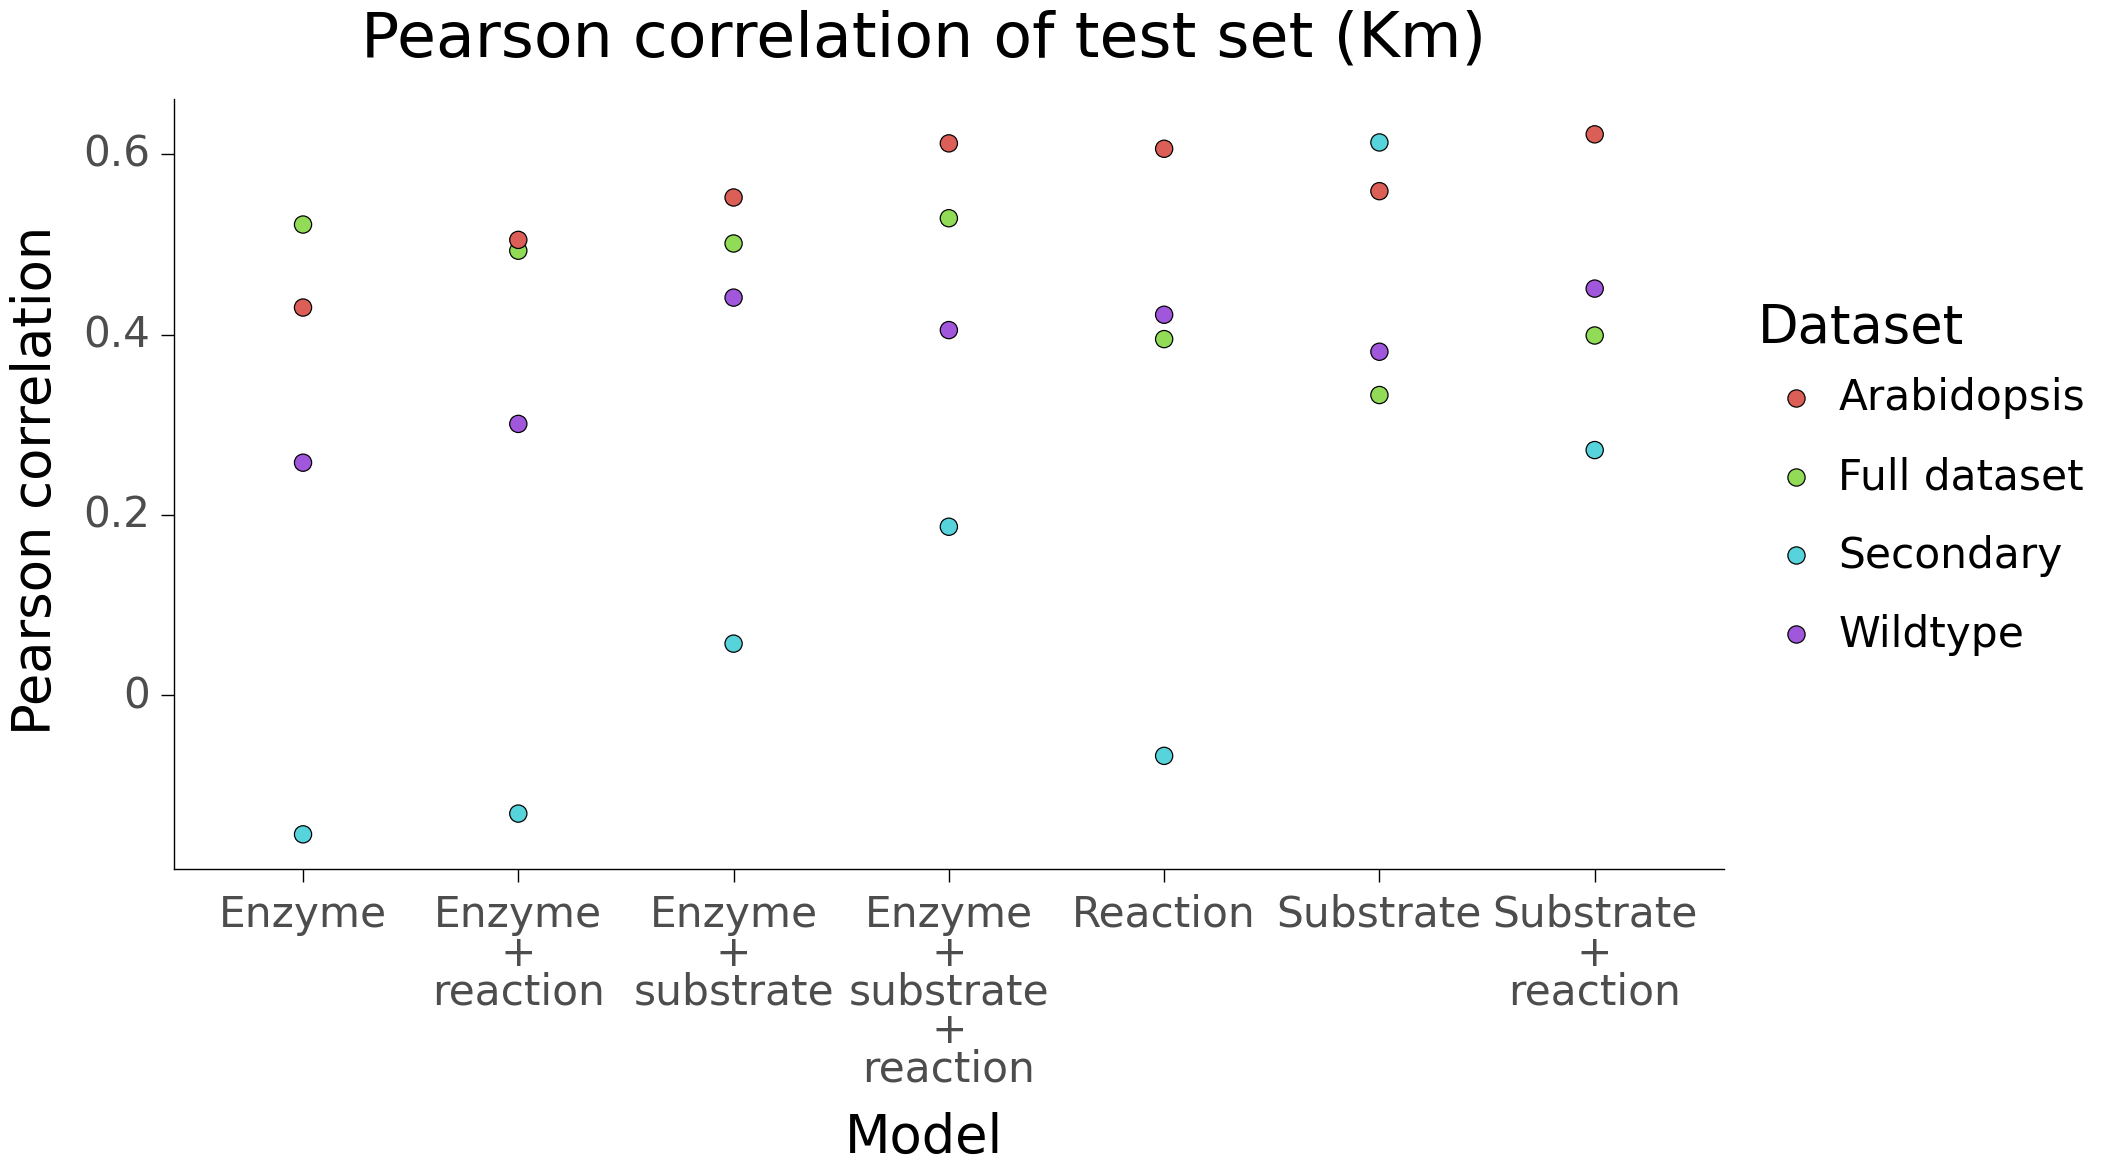

<ggplot: (-9223371903674492940)>

In [ ]:
(
    ggplot(results_test, aes(x = "Model", y="Pearson correlation"))
    + geom_point(aes(fill="Dataset"), size=6.5) 
    + scale_x_discrete(labels= ["Enzyme","Enzyme\n+\nreaction", "Enzyme\n+\nsubstrate", "Enzyme\n+\nsubstrate\n+\nreaction", "Reaction", "Substrate", "Substrate\n+\nreaction"])
    + labs(title="Pearson correlation of test set (Km)", x="Model", y="Pearson correlation", fill="Dataset")
    + theme_classic(base_size=38)
    + theme(figure_size=(20, 10))
)

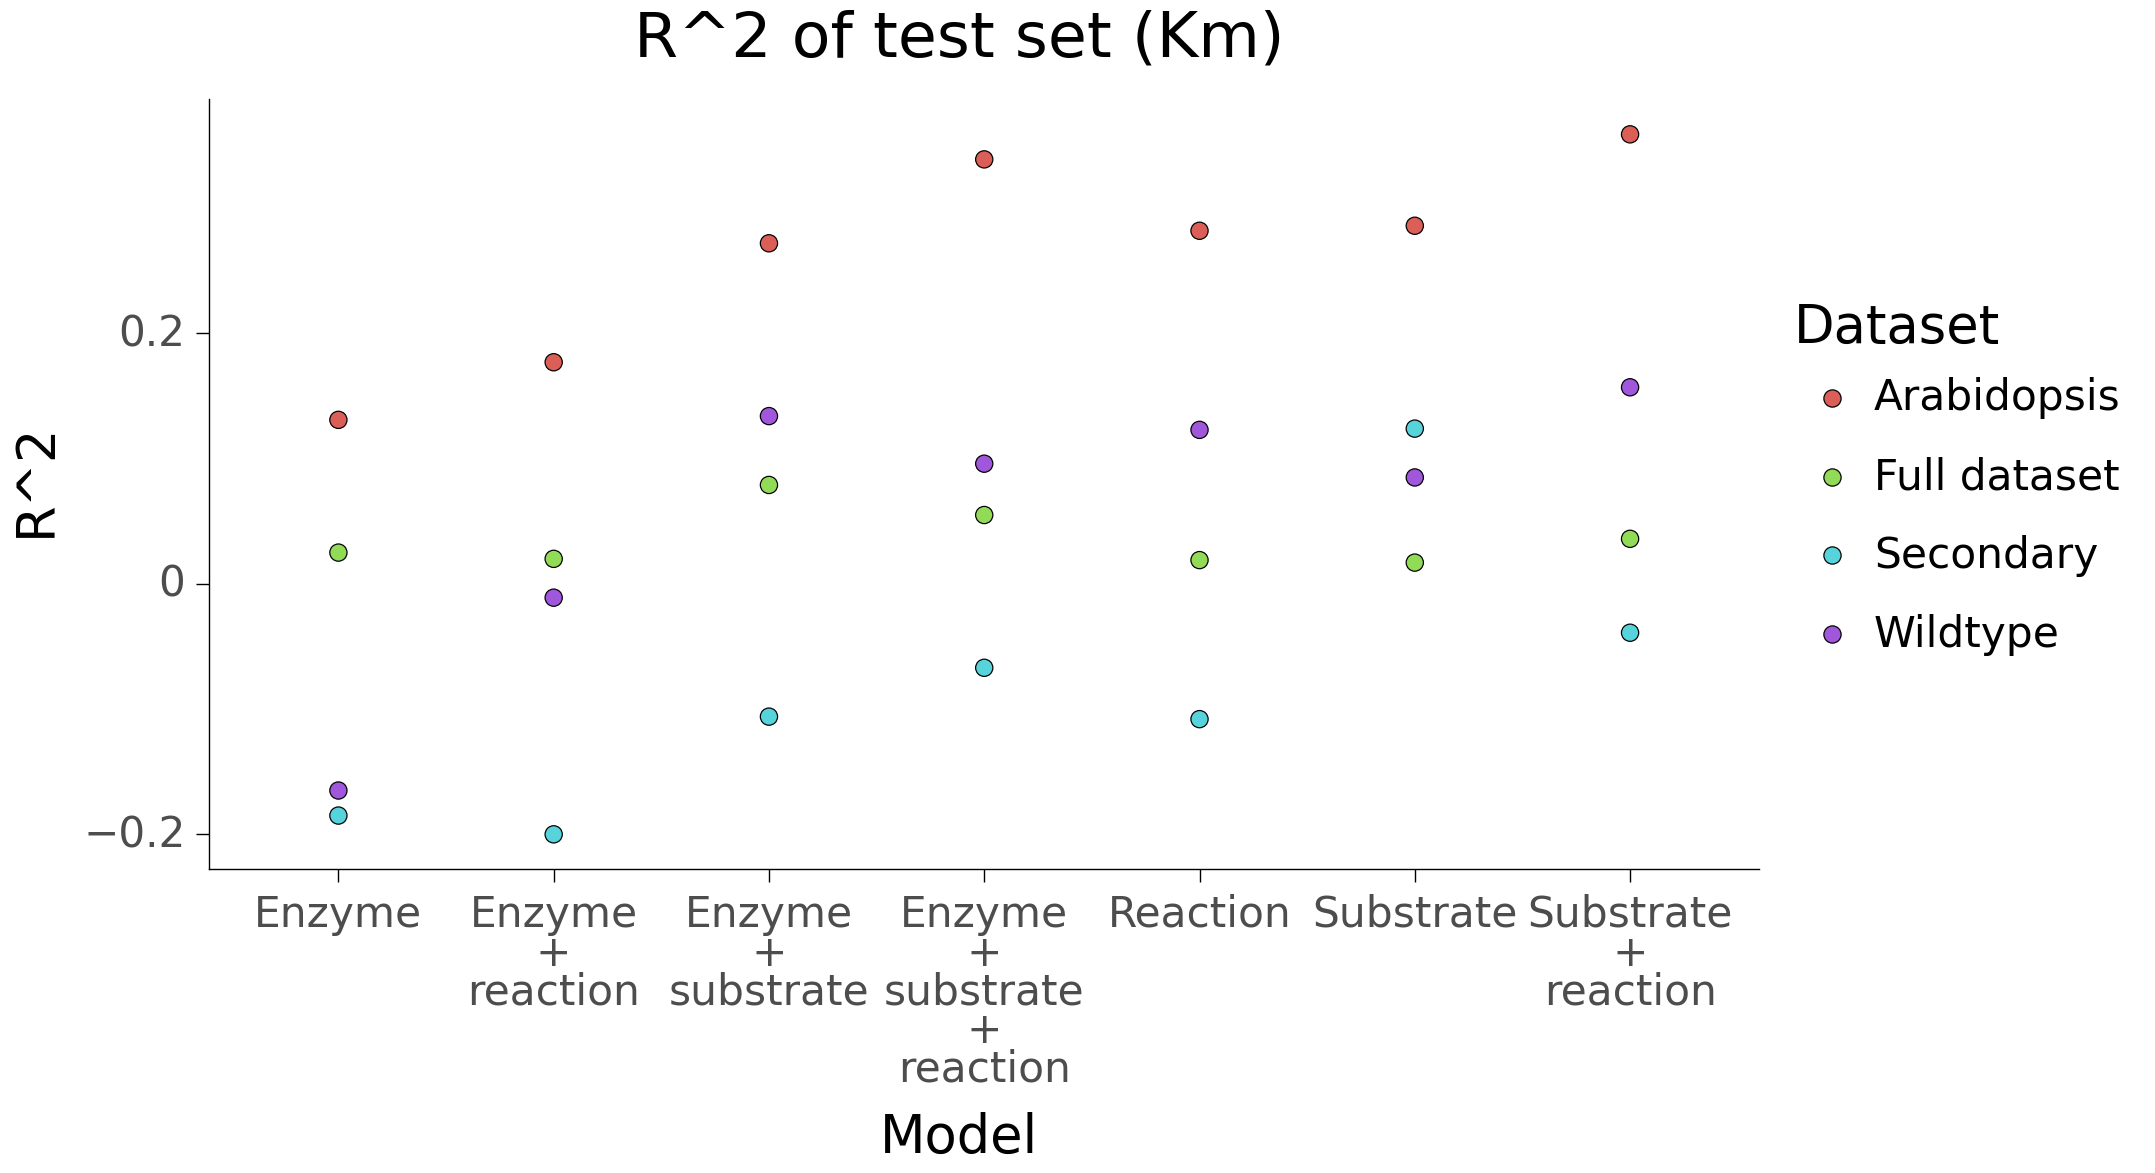

<ggplot: (-9223371903673958668)>

In [ ]:
(
    ggplot(results_test, aes(x = "Model", y="R^2"))
    + geom_point(aes(fill="Dataset"), size=6.5) 
    + scale_x_discrete(labels= ["Enzyme","Enzyme\n+\nreaction", "Enzyme\n+\nsubstrate", "Enzyme\n+\nsubstrate\n+\nreaction", "Reaction", "Substrate", "Substrate\n+\nreaction"])
    + labs(title="R^2 of test set (Km)", x="Model", y="R^2", fill="Dataset")
    + theme_classic(base_size=38)
    + theme(figure_size=(20, 10))
)

In [ ]:
results_val = pd.read_csv('../../results/Results_val.csv')

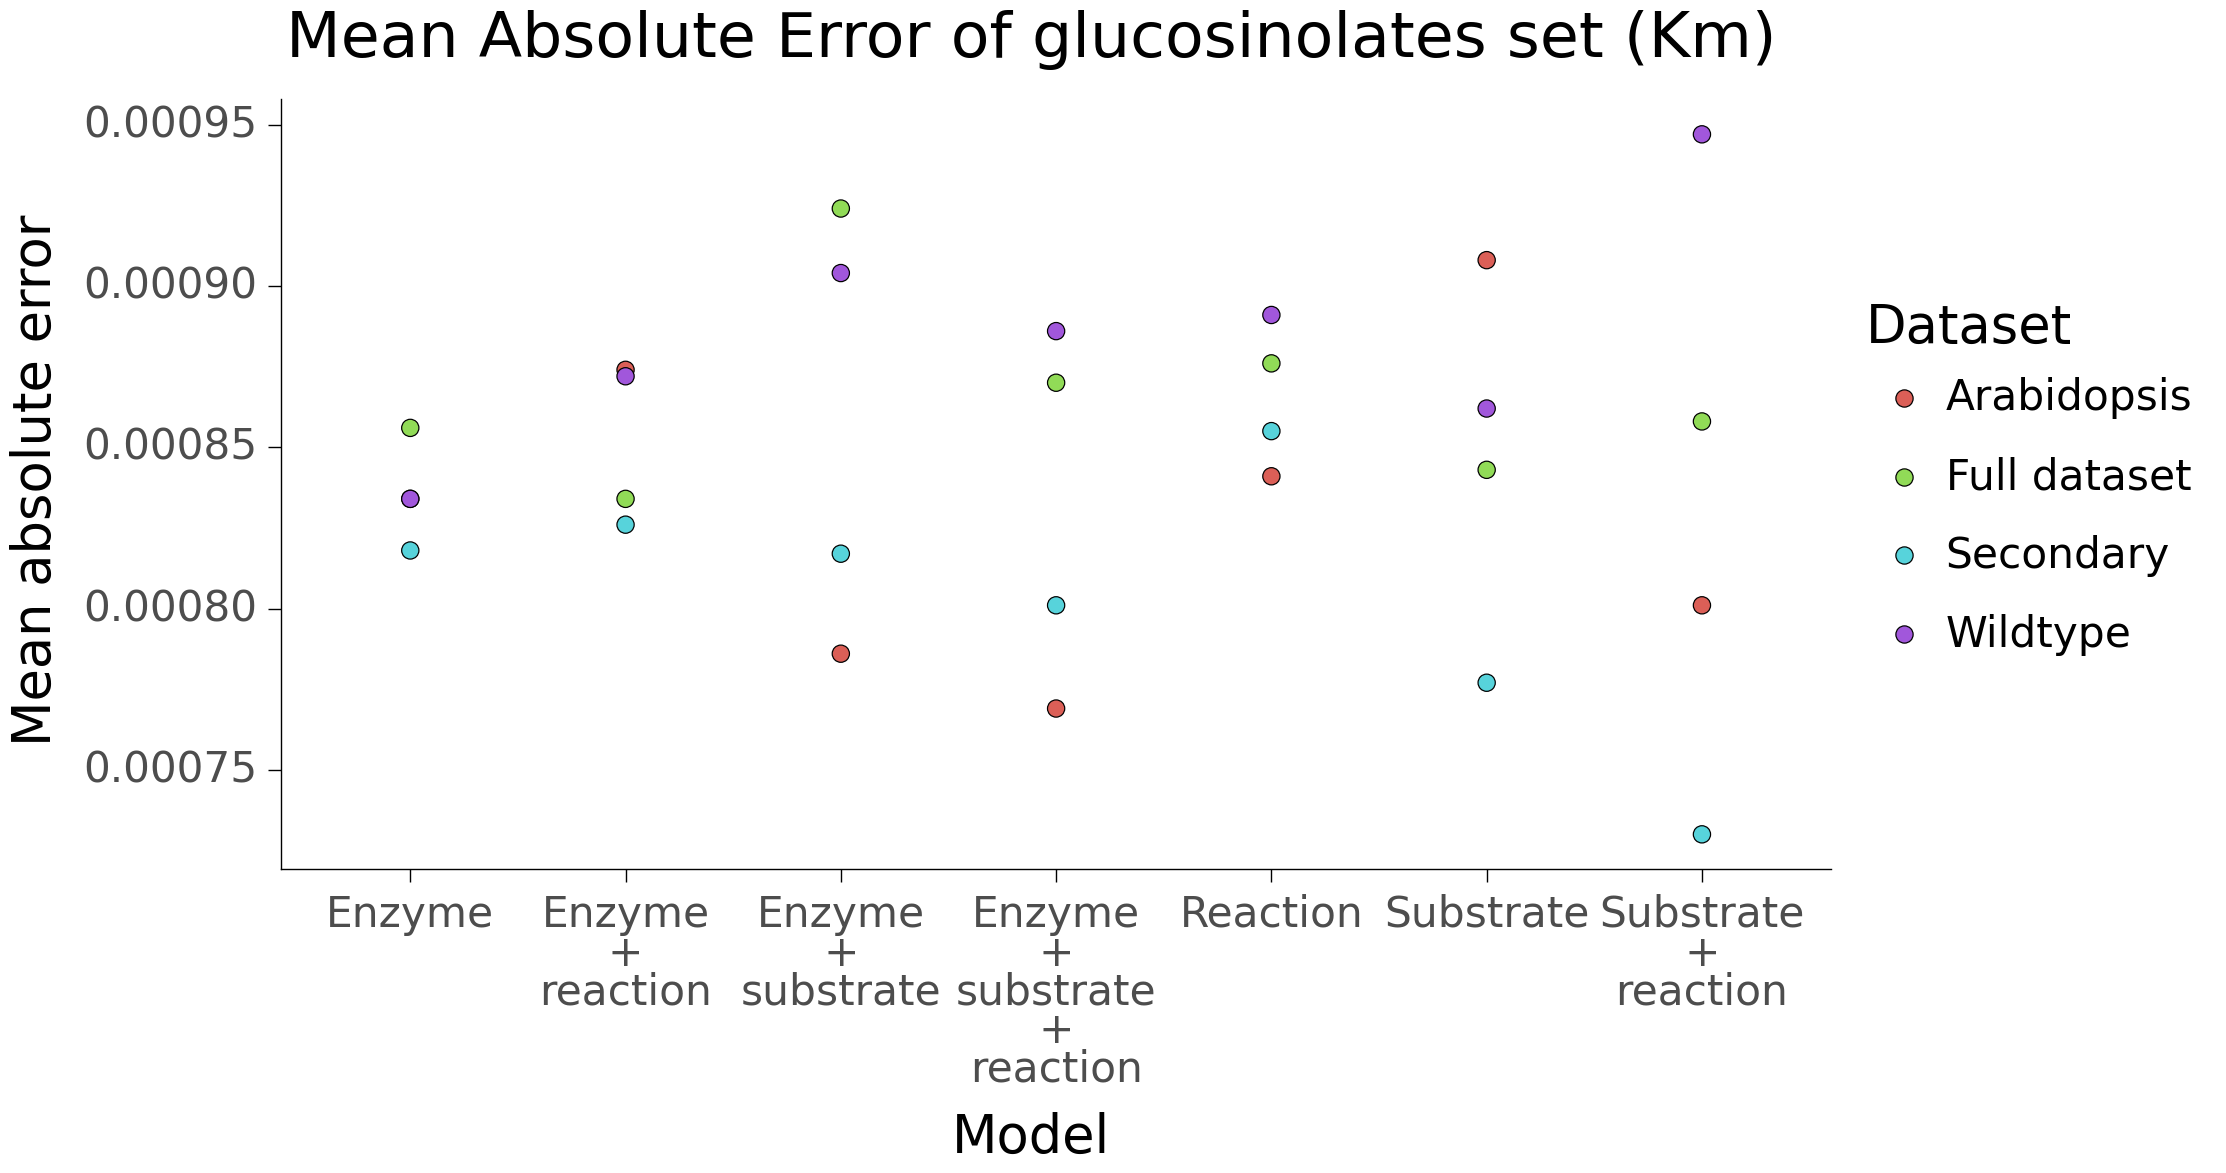

<ggplot: (-9223371903674010268)>

In [ ]:
(
    ggplot(results_val, aes(x = "Model", y="MAE"))
    + geom_point(aes(fill="Dataset"), size=6.5) 
    + scale_x_discrete(labels= ["Enzyme","Enzyme\n+\nreaction", "Enzyme\n+\nsubstrate", "Enzyme\n+\nsubstrate\n+\nreaction", "Reaction", "Substrate", "Substrate\n+\nreaction"])
    + labs(title="Mean Absolute Error of glucosinolates set (Km)", x="Model", y="Mean absolute error", fill="Dataset")
    + theme_classic(base_size=38)
    # + position_dodge(width=1.0, preserve="total")
    + theme(figure_size=(20, 10))
)

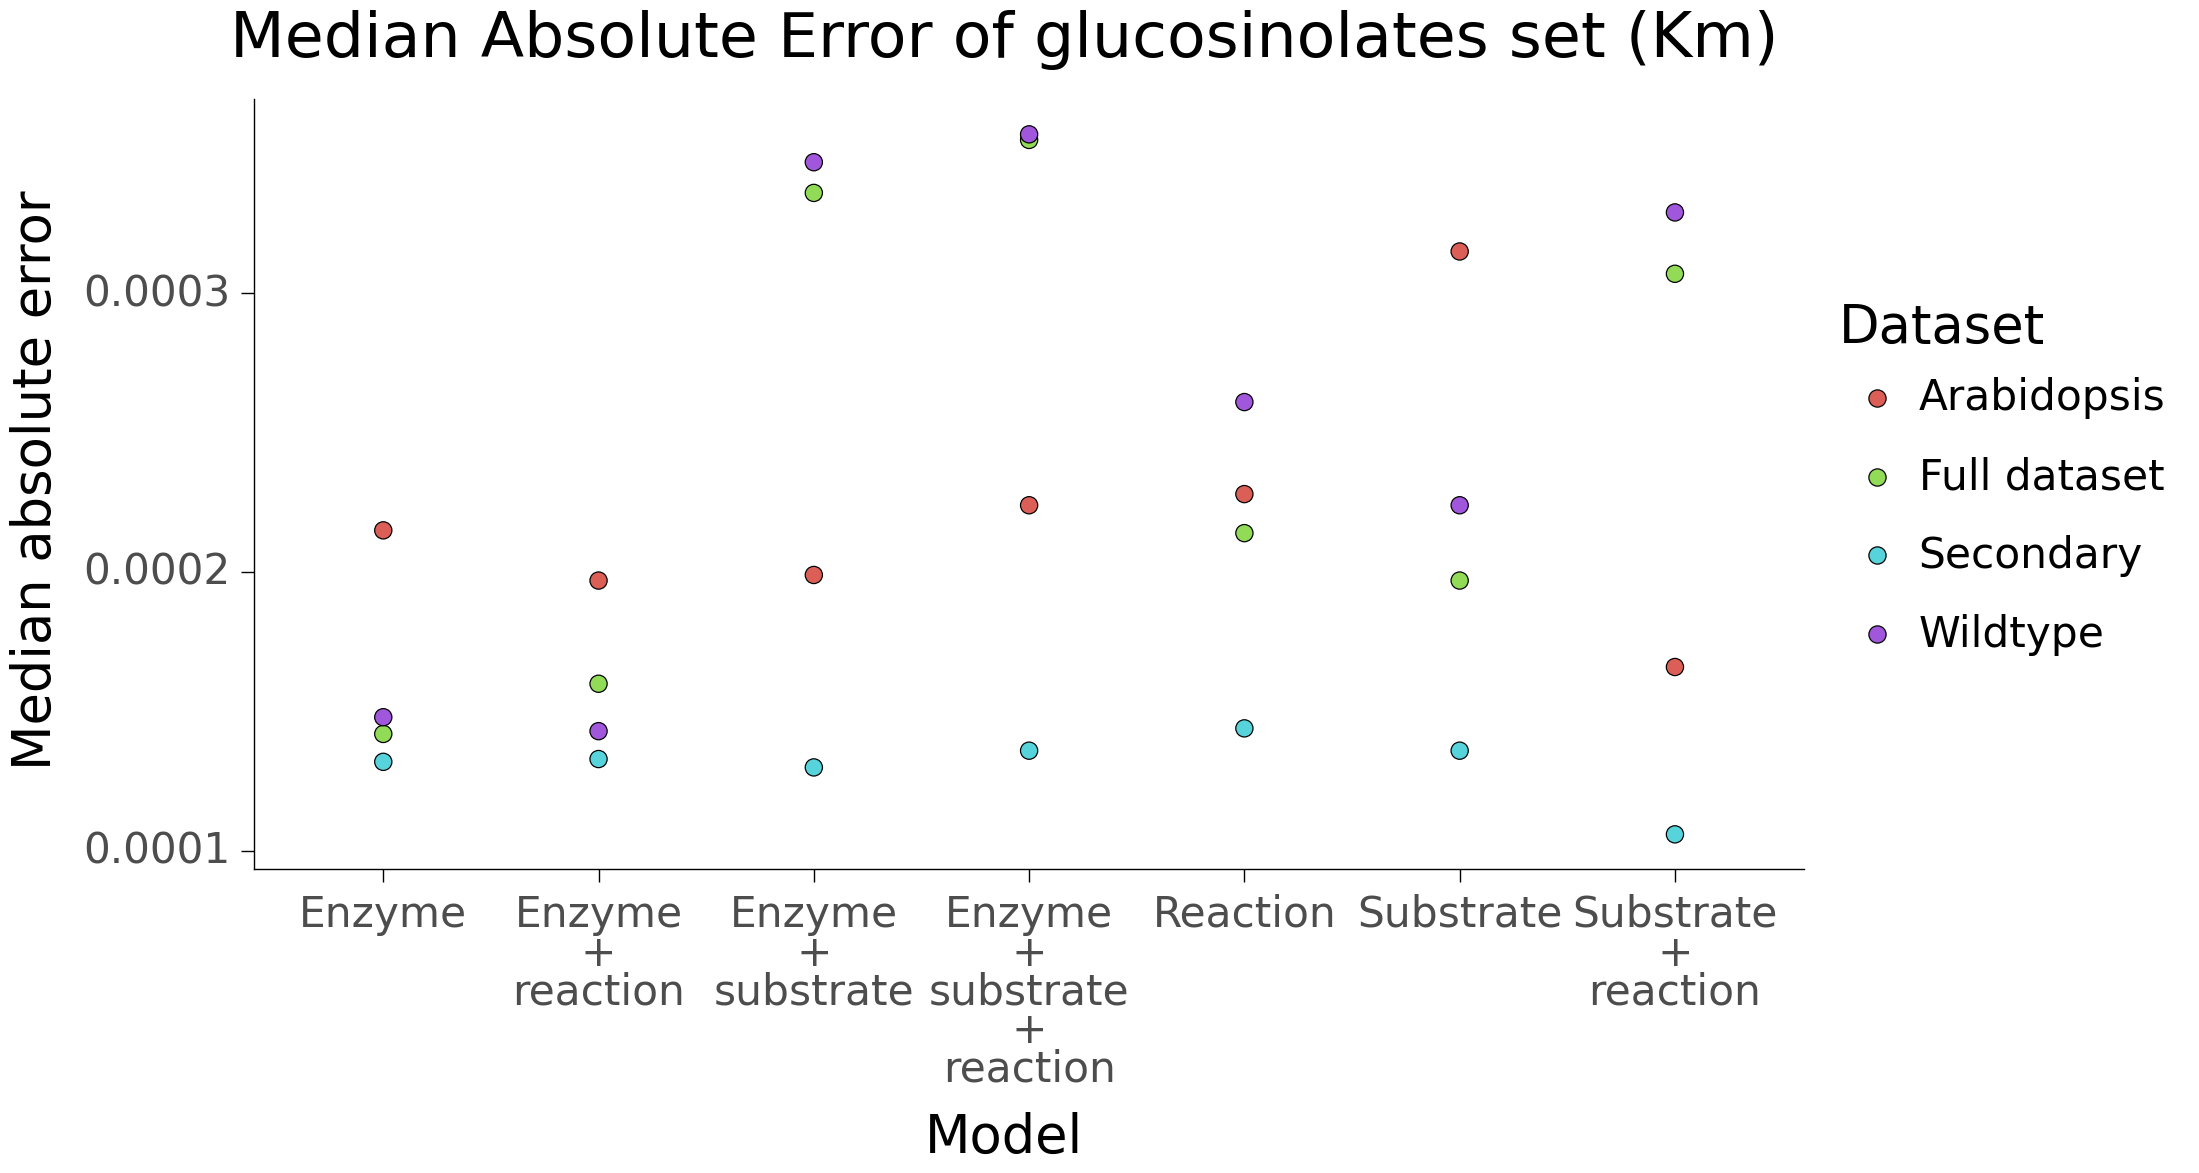

<ggplot: (-9223371903673703184)>

In [ ]:
(
    ggplot(results_val, aes(x = "Model", y="MedAE"))
    + geom_point(aes(fill="Dataset"), size=6.5) 
    + scale_x_discrete(labels= ["Enzyme","Enzyme\n+\nreaction", "Enzyme\n+\nsubstrate", "Enzyme\n+\nsubstrate\n+\nreaction", "Reaction", "Substrate", "Substrate\n+\nreaction"])
    + labs(title="Median Absolute Error of glucosinolates set (Km)", x="Model", y="Median absolute error", fill="Dataset")
    + theme_classic(base_size=38)
    + theme(figure_size=(20, 10))
)

In [11]:
pred_y = np.load(join("..", "..", "data", split, "y_val_pred_xgboost_ESM2_gnn_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_ESM2_gnn_fp.npy"))
esm2_gnn_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_ESM2_diff_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_ESM2_diff_fp.npy"))
esm2_diff_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_ESM2_gnn_fp_diff_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_ESM2_gnn_fp_diff_fp.npy"))
esm2_gnn_fp_diff_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_ESM2.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_ESM2.npy"))
esm2 = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_gnn_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_gnn_fp.npy"))
gnn_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_diff_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_diff_fp.npy"))
diff_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_diff_fp_gnn_fp.npy"))
test_y = np.load(join("..", "..", "data", split, "y_test_true_xgboost_diff_fp_gnn_fp.npy"))
diff_fp_gnn_fp = abs(10**pred_y-10**test_y)

pred_y = np.load(join("..", "..", "data", split, "y_val_pred_xgboost_diff_fp_gnn_fp_mini.npy"))
val_y = np.load(join("..", "..", "data", split, "y_val_mini.npy"))
diff_fp_gnn_fp_mini = abs((10**pred_y)/1000-(10**val_y)/1000)

pred_y = np.load(join("..", "..", "data", split, "y_test_pred_xgboost_baseline.npy"))
val_y = np.load(join("..", "..", "data", split, "y_val.npy"))
baseline = abs((10**pred_y/1000)-10**val_y)


Difference between predictions with substrate+reaction and enzyme+substrate 0.2583804130554199
Difference between predictions with substrate+reaction and enzyme+substrate+reaction 0.3413567543029785
Difference between predictions with substrate+reaction and enzyme 0.24740123748779297
Difference between predictions with substrate+reaction and substrate 0.3926825523376465
Difference between predictions with substrate+reaction and reaction 0.07348203659057617
Difference between predictions with substrate+reaction and enzyme+reaction 0.23666715621948242
Difference between predictions with substrate+reaction and baseline 0.5
Difference between predictions with substrate+reaction and substrate+reaction mini 0.35541629791259766


In [ ]:
d = diff_fp_gnn_fp- esm2_gnn_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and enzyme+substrate", p)

d = diff_fp_gnn_fp - esm2_gnn_fp_diff_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and enzyme+substrate+reaction", p)

d = diff_fp_gnn_fp - esm2
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and enzyme", p)

d = diff_fp_gnn_fp - gnn_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and substrate", p)

d = diff_fp_gnn_fp - diff_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and reaction", p)

d = diff_fp_gnn_fp - esm2_diff_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and enzyme+reaction", p)

d = diff_fp_gnn_fp - baseline
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with substrate+reaction and baseline", p)

d = diff_fp_gnn_fp - diff_fp_gnn_fp_mini
w, p = wilcoxon(d, alternative='two-sided')
print("Difference between predictions with substrate+reaction and substrate+reaction mini", p)

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import matplotlib.cm as cmx

# plt.scatter(val_Y,y_val_pred, c='blue', edgecolors='black',s=15)
    
# plt.xlim(-6,2)
# plt.ylim(-6,2)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Real value', fontsize=15)
# plt.ylabel('Estimated value', fontsize=15)
# plt.title('Predictions', fontsize=15)
# plt.axline((1, 1), slope=1, c='red')
# plt.show()

In [ ]:
# data_combined = pd.concat([data_train, data_test],ignore_index=True)

In [ ]:
# def calculate_identity_ignore_gaps(seq1, seq2):
#     identical_residues = sum([1 for x, y in zip(seq1, seq2) if x == y and x != "-"])
#     pid = identical_residues / sum([1 for x in seq1 if x != "-"]) 
#     return pid

# from Bio import Align
# from Bio.Align import substitution_matrices

# data_val["max_identity"] = np.nan

# aligner=Align.PairwiseAligner()
# aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
# aligner.mode = "global"
# aligner.extend_gap_score = -0.5
# aligner.open_gap_score = -10

# for i in data_val.index:
#     identities = []
#     for j in data_combined.index:
#         seq1 = str(data_val["Sequence"][i])
#         seq2 = str(data_combined["Sequence"][j])
#         if 'U' in seq1:
#             seq1 = seq1.replace('U', 'C')
#         if 'U' in seq2:
#             seq2 = seq2.replace('U', 'C')
#         alignments = aligner.align(seq1, seq2)
#         identities.append(calculate_identity_ignore_gaps(alignments[0][0], alignments[0][1]))
#     data_val["max_identity"][i] = max(identities)

In [ ]:
# data_val["max_identity"] = data_val["max_identity"]*100

In [ ]:
# import matplotlib.pyplot as plt
# import sklearn.metrics as sk
# import math

# fig, ax = plt.subplots(figsize= (10,8))
# plt.rcParams.update({'font.size': 28})

# splits = ["0-40%", "40-80%", "80-99%", "99-100%"]
# lower_bounds = [0,40,80,99]
# upper_bounds = [40,80,99,100]

# points1 = []
# points2 = []
# n_points1, n_points2 = [], []

# for i, split in enumerate(splits):

#     lb, ub = lower_bounds[i], upper_bounds[i]
    
#     help_df = data_val.loc[data_val["max_identity"]>= lb].loc[data_val["max_identity"]<= ub]
#     y_true = np.array([10**x for x in help_df["log10_Km"]])
#     y_pred = np.array([10**x for x in help_df["Estimate Km"]])
#     n_km = len(y_pred)
#     R2 =  sk.r2_score(y_true, y_pred)
#     abs_error = abs(y_true - y_pred)
#     rmse = math.sqrt(np.mean(abs(y_true - y_pred)**2))
#     print(len(y_true))
#     print(split, R2, rmse)
#     points1.append(R2)
#     points2.append(rmse)
#     n_points1.append(n_km)


# ticks2 = np.array(range(len(splits)))
# labs = splits
# ax.set_xticks(ticks2)
# ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
# ax.tick_params(axis='x', length=0, rotation = 0)

# # plt.ylim((-0.1,2.5))
# # plt.xlim((-0.2, 3.2))
# plt.legend(loc = "lower right", fontsize=20)
# plt.ylabel('RMSE')
# plt.xlabel('Enzyme sequence identity')
# ax.yaxis.set_label_coords(-0.15, 0.5)
# ax.xaxis.set_label_coords(0.5,-0.13)

# plt.plot([-0.15,4], [0,0], color='grey', linestyle='dashed')


# plt.plot([0,1,2,3], points2, c= "black", linewidth=2)

# for i, split in enumerate(splits):
#     points1.append(R2)
    
#     if i ==0:
#         plt.scatter(i, points2[i], c='black', marker="o", linewidths= 8)
#         ax.annotate(n_points1[i], (i-0.08, points2[i]+0.08), fontsize=17, c= "red", weight = "bold")

#     else:
#         plt.scatter(i, points2[i], c='black', marker="o", linewidths= 8)
#         ax.annotate(n_points1[i], (i-0.08, points2[i]+0.08), fontsize=17, c= "red", weight = "bold")
            
     
# plt.savefig(join("..","..", "results", split, "sequence_identity.png"))
# plt.show()

In [ ]:
# EC_km_pred =[[] for _ in range(6)]
# EC_km =[[] for _ in range(6)]
# for ind in data_val.index:
#     try:
#         EC = int(data_val["ECs"][ind][0][0])
#         EC_km[EC-1].append(data_val["log10_Km"][ind])
#         EC_km_pred[EC-1].append(data_val["Estimate Km"][ind])
#     except IndexError:
#         pass

In [ ]:
# fig, ax = plt.subplots(figsize= (8,8))
# plt.rcParams.update({'font.size': 28})

# classes = [str(i) for i in range(1,7)]

# for i in range(len(EC_km)):
    
#     circle = plt.Circle((np.mean(EC_km[i]), np.mean(EC_km_pred[i]) ),
#                         np.sqrt(len(EC_km_pred[i]))/300, color='navy', fill = True)
#     ax.add_artist(circle)
#     if i ==5:
#         ax.annotate("EC"+ str(i+1), (np.mean(EC_km[i])+0.01, np.mean(EC_km_pred[i])-0.05), fontsize=17, c='red', weight = "bold")
#     else:
#         ax.annotate("EC"+ str(i+1), (np.mean(EC_km[i])+0.03, np.mean(EC_km_pred[i])-0.01), fontsize=17, c='red', weight = "bold")
    

# # ticks2 = [0.2, 0.6,1,1.4,1.8]
# # labs = ticks2
# # ax.set_xticks(ticks2)
# # ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
# # ax.tick_params(axis='x', length=0, rotation = 0)

# # ax.set_yticks(ticks2)
# # ax.set_yticklabels(labs,  y= -0.03, fontsize=26)
# # ax.tick_params(axis='y', length=0, rotation = 0)

# plt.ylim((-6,-1))
# plt.xlim((-6, -1))
# plt.legend(loc = "upper left", fontsize=20)
# plt.xlabel('mean measured \n $k_{m}$ value on $\log_{10}$-scale')
# plt.ylabel('mean predicted \n $k_{m}$ value on $\log_{10}$-scale')
# ax.yaxis.set_label_coords(-0.15, 0.5)
# ax.xaxis.set_label_coords(0.5,-0.13)
# plt.axline((1, 1), slope=1, c='grey', alpha = 0.3, linestyle='dashed')
# plt.savefig(join("..", "..", "results", split, "EC_classes_mean_km.png"))
# plt.show()

In [ ]:
# import scipy

# train_fps = [np.array(list(data_combined["MACCS FP"][ind])).reshape(1,-1) for ind in data_combined.index]
# test_fps = [np.array(list(data_val["MACCS FP"][ind])).reshape(1,-1) for ind in data_val.index]

# max_sim = []

# for fp in test_fps:
#     jaccard_sim = np.array([1 - scipy.spatial.distance.cdist(fp,train_fp, metric='jaccard')[0][0] for train_fp in train_fps])
#     max_sim.append(np.max(jaccard_sim))
    
# data_val["substrate_sim"] = max_sim

# data_val["substrate_sim"]= (data_val["substrate_sim"] - np.min(data_val["substrate_sim"]))
# data_val["substrate_sim"] = data_val["substrate_sim"]/np.max(data_val["substrate_sim"])

In [ ]:
# data_val["global_sim"] = (data_val["max_identity"]/100)*data_val["substrate_sim"]

In [ ]:
# data_val.describe()

In [ ]:
# import matplotlib.pyplot as plt
# import math
# import scipy as sci
# help_df = data_val

# sim_bins_lb = [0.0, 0.4, 0.8]
# sim_bins_ub = [0.4, 0.8, 1]
# r2_scores, n_points, pearson_r, rmse = [], [], [], []
# for i in range(len(sim_bins_lb)):
#     help_df2 = help_df.loc[help_df["global_sim"] <= sim_bins_ub[i]].loc[help_df["global_sim"] >= sim_bins_lb[i]]
#     pred = np.array([10**x for x in help_df2["log10_Km"]])
#     true = np.array([10**x for x in help_df2["Estimate Km"]])
#     r2_scores.append(sk.r2_score(true, pred))
#     pearson_r.append(sci.stats.pearsonr(true, pred)[0])
#     rmse.append(math.sqrt(np.mean(abs(true - pred)**2)))
#     n_points.append(len(pred))
#     print("%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]), r2_scores[-1], pearson_r[-1], rmse[-1], len(pred))
    

# plt.rcParams.update({'font.size': 24})

# fig, ax = plt.subplots(figsize= (8,6))

# for i in range(len(sim_bins_lb)):    
#     plt.scatter(i, rmse[i], c='navy', marker="o", linewidths= 8)
#     ax.annotate(n_points[i], (i-0.08, rmse[i]+0.05), fontsize=17, c= "black", weight = "bold")

    
# plt.xlabel('Reaction similarity score')
# plt.ylabel('RMSE')
# ax.yaxis.set_label_coords(-0.2, 0.5)
# ax.xaxis.set_label_coords(0.5,-0.23)

# ticks2 = np.array(range(len(sim_bins_lb)))
# labs = ["%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]) for i in range(len(sim_bins_lb))]
# ax.set_xticks(ticks2)
# ax.set_xticklabels(labs,  y= -0.03, fontsize=20)
# ax.tick_params(axis='x', length=0, rotation = 0)

# # plt.ylim((0.5,2))
# #plt.xlim((-0.5, 3.2))

# # plt.plot([-0.49, 4], [0,0], color='grey', linestyle='dashed')
# #plt.savefig(join("..","..", "results", split, "figures", "Reaction_Similarity_Score.eps"))
# plt.show()